- Data points similar to each other are grouped togethter, and then these groups are put together with data points/clusters to which they are similar
- This can be done in a divisive way, where we start with all of the points in one cluster, and then branch out into different groups, or take the data points and then form the clusters.
- You can use many different distance metrics to calcualte the distance between points, Eucildian distance is the most common
- How do we measure distance between two clusters -> Ward, Average, Min Max distance between clusters. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/cluster_mpg.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [6]:
df["origin"].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [8]:
df_dum = pd.get_dummies(df.drop("name", axis=1))

In [10]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            392 non-null    float64
 1   cylinders      392 non-null    int64  
 2   displacement   392 non-null    float64
 3   horsepower     392 non-null    float64
 4   weight         392 non-null    int64  
 5   acceleration   392 non-null    float64
 6   model_year     392 non-null    int64  
 7   origin_europe  392 non-null    uint8  
 8   origin_japan   392 non-null    uint8  
 9   origin_usa     392 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 22.7 KB


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaled_data = scaler.fit_transform(df_dum)

In [15]:
scaled_df = pd.DataFrame(data=scaled_data, columns=df_dum.columns)

In [16]:
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


<AxesSubplot:>

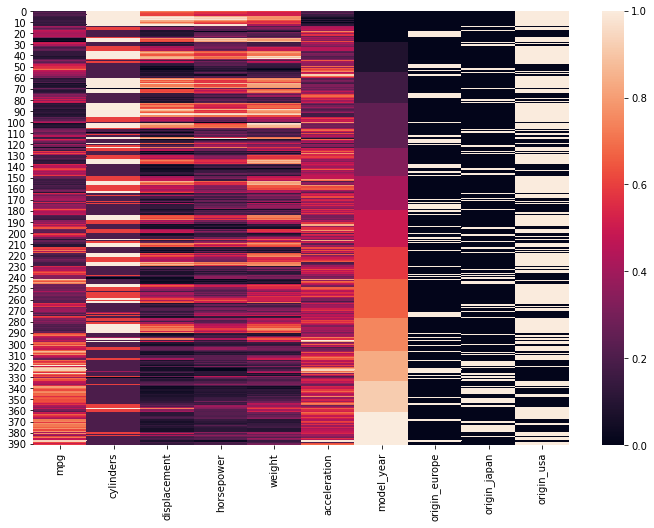

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(scaled_df)

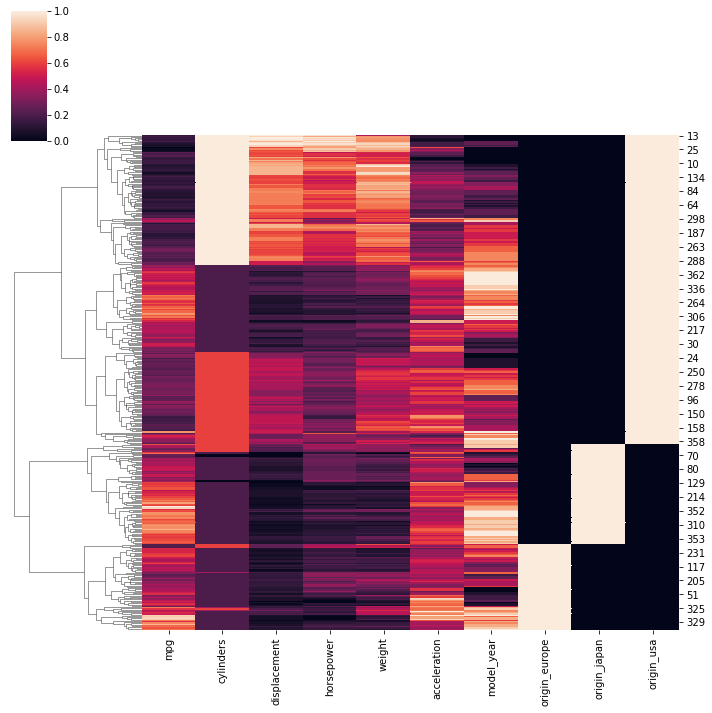

In [22]:
sns.clustermap(scaled_df, col_cluster=False)

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
model = AgglomerativeClustering(n_clusters=3)

In [32]:
cluster_labels = model.fit_predict(scaled_df)

In [33]:
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0,

<AxesSubplot:xlabel='mpg', ylabel='weight'>

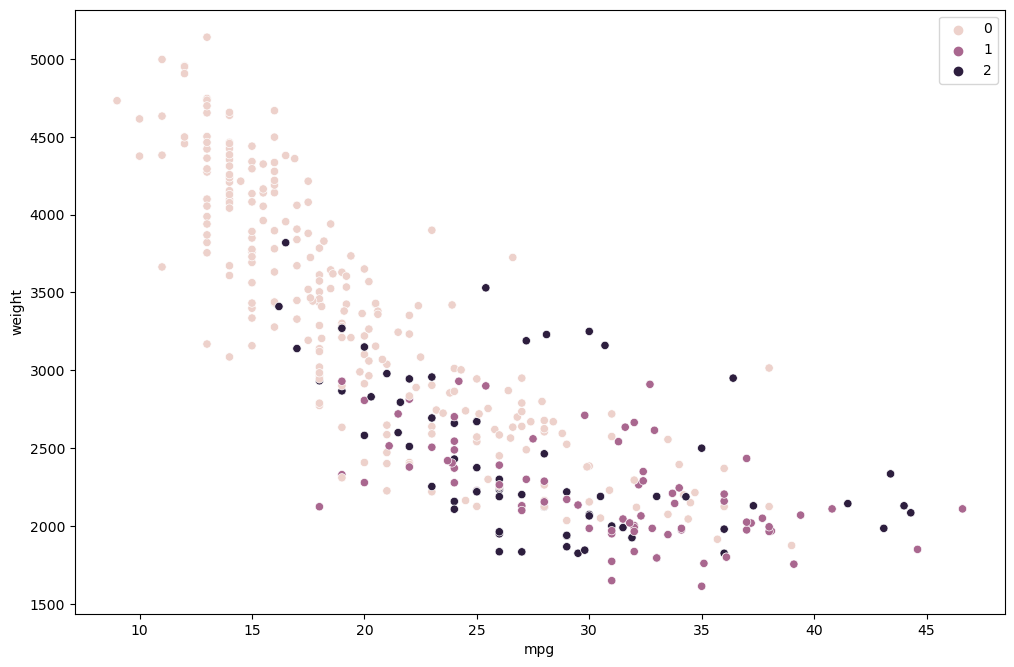

In [34]:
plt.figure(figsize=(12,8), dpi=100)
sns.scatterplot(data=df, x="mpg", y="weight", hue=cluster_labels)

In [35]:
len(scaled_df.columns)

10

In [38]:
np.sqrt(10) # The max distance between two points due to having min/max scaling

3.1622776601683795

In [71]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=2)

In [73]:
labels = model.fit_predict(scaled_df)

In [79]:
pd.Series(labels)

0      3
1      3
2      3
3      3
4      3
      ..
387    2
388    8
389    2
390    2
391    2
Length: 392, dtype: int64

In [50]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [51]:
linkage_matrix = hierarchy.linkage(model.children_)

In [52]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

In [53]:
len(linkage_matrix)

390

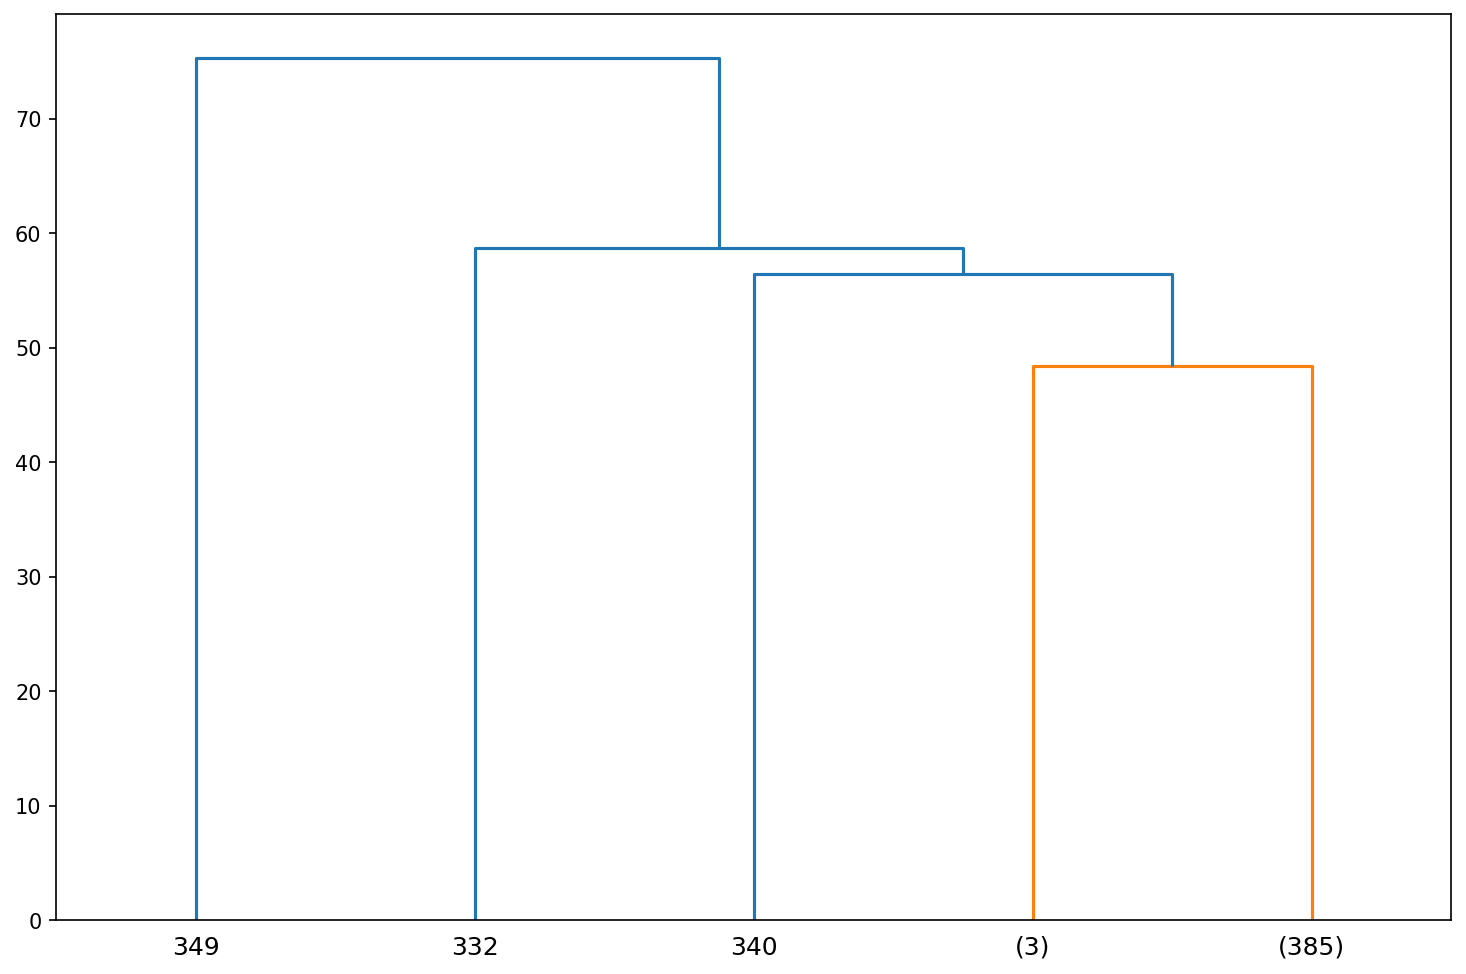

In [65]:
plt.figure(figsize=(12,8), dpi=150)
dendro = dendrogram(linkage_matrix, truncate_mode="level", p=3)

In [64]:
scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,0.384200,0.207580,0.0,0.212766,0.365691,0.531915,1.0
cylinders,392.0,0.494388,0.341157,0.0,0.200000,0.200000,1.000000,1.0
displacement,392.0,0.326646,0.270398,0.0,0.095607,0.214470,0.536822,1.0
horsepower,392.0,0.317768,0.209191,0.0,0.157609,0.258152,0.434783,1.0
weight,392.0,0.386897,0.240829,0.0,0.173589,0.337539,0.567550,1.0
acceleration,392.0,0.448888,0.164218,0.0,0.343750,0.446429,0.537202,1.0
model_year,392.0,0.498299,0.306978,0.0,0.250000,0.500000,0.750000,1.0
origin_europe,392.0,0.173469,0.379136,0.0,0.000000,0.000000,0.000000,1.0
origin_japan,392.0,0.201531,0.401656,0.0,0.000000,0.000000,0.000000,1.0
origin_usa,392.0,0.625000,0.484742,0.0,0.000000,1.000000,1.000000,1.0


In [66]:
scaled_df["mpg"].idxmax()

320

In [67]:
scaled_df["mpg"].idxmin()

28

In [69]:
car_a = scaled_df.iloc[320]
car_b = scaled_df.iloc[28]

distance = np.linalg.norm(car_a-car_b)

In [70]:
distance

2.3852929970374714